<a href="https://colab.research.google.com/github/nicole-002/logicaporgramacaopayton/blob/main/An%C3%A1lse_dados/An%C3%A1lise_dados_vinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados: Red Wine Quality

In [ ]:
# importando biblioteca tema: Vinho

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Significados do dataset

- fixed acidity = acidez fixa
- volatile acidity = acidez volátil (que muda)
- citric acid = ácido cítrico
- residual sugar = açúcar residual
- chlorides = cloretos
- free sulfur dioxide = dóxido de enxofre livre
- total sulfur dioxide = dióxido de enxofre total
- density = densidade
- sulphates = sulfatos
- alcohol = álcool
- quality = qualidade (0-10)


In [ ]:
#carregando os dados

df = pd.read_csv("https://raw.githubusercontent.com/nicole-002/logicaporgramacaopayton/refs/heads/main/An%C3%A1lse_dados/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#Definição do problema

1 - Qual os fatores que mais influenciam na qualidade do vinho?\
2 - A quantidade de alcool afeta algum fator?\
3 - Qual componente altera/afeta a densidade do vinho?\
4 - Qual é o impacto dos fatores de acidez (acidez fixa, acidez volátil, ácido cítrico) com a qualidade do vinho?

#Exploração de Dados

In [ ]:
df.isnull().sum()
# verificando se há valores vazios

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
df.info()
# descobrindo o tipo dos valores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Visualizando Dados
criando gráficos para responder as perguntas

#Pergunta 1:  Qual os fatores que mais influenciam na qualidade do vinho?


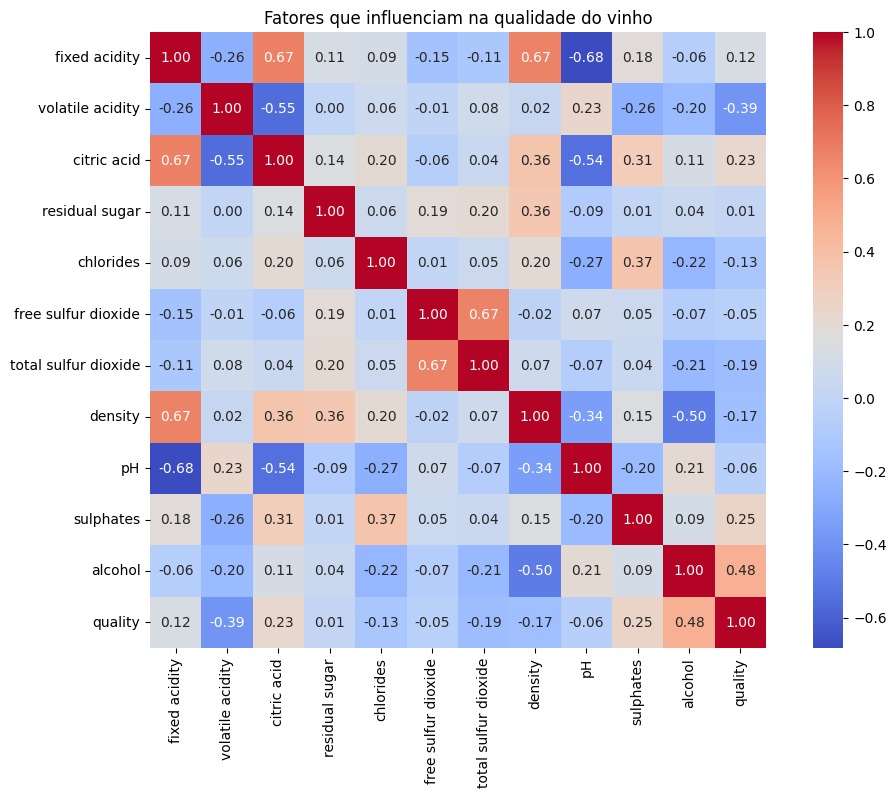

In [ ]:
# Calcular a matriz de correlação usando apenas colunas numéricas
correlation_matrix = df.select_dtypes(include='number').corr()

plt.figure(figsize=(12, 8))# criando o heatmeap e definindo o tamanho do espaço ultilizado, valor 1 = comprimento, valor 2 = altura

sns.heatmap(correlation_matrix, annot=True, fmt=".02f", cmap='coolwarm', square=True)# cmap define as cores; fmt define a quantidade de decimais

plt.title('Fatores que influenciam na qualidade do vinho')
plt.show()

Resposta 1: Conclui-se que valores que mais influenciam na qualidade do vinho são o álcool (com uma relação positiva, ou seja, a qualidade aumenta quando a quantidade de álcool também aumenta) e a acidez volátil (com uma relação negativa, ou seja, quanto maior a acidez volátil, menor a qualidade do vinho)



#Pergunta 2: O alcool afeta algum outro componente?

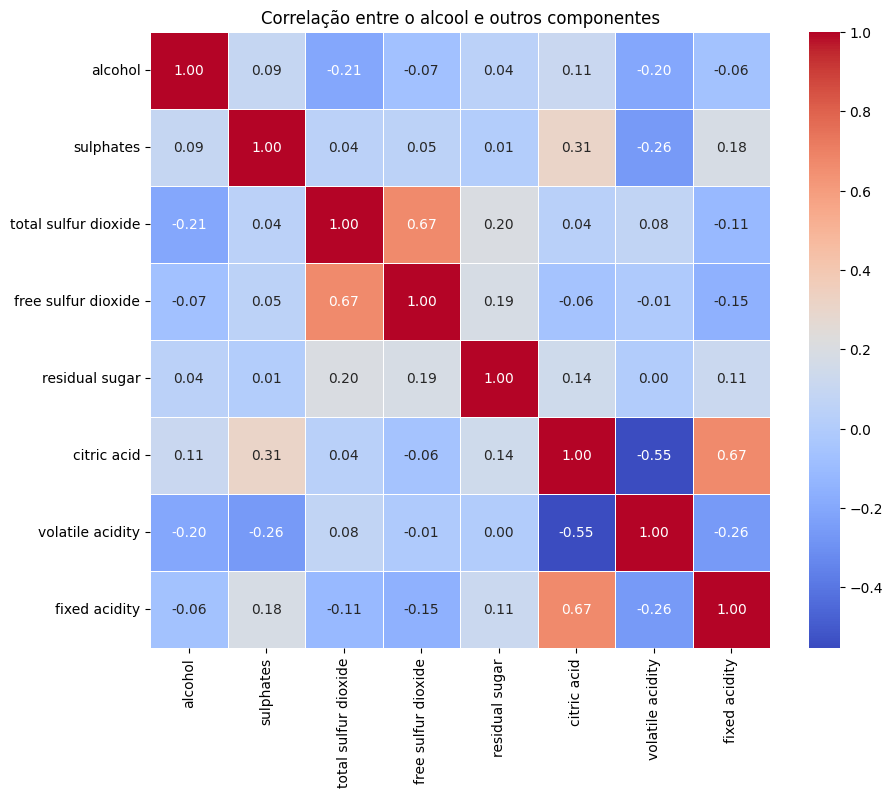

In [ ]:

cols = ['alcohol','sulphates','total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'citric acid', 'volatile acidity', 'fixed acidity'] #colunas específicas para criar o heatmeap
plot_data = df[cols]

corr = plot_data.corr()
# calcula a correlação entre as colunas selecionadas

plt.figure(figsize=(10, 8))
# criando a imagem do heatmeap e definindo seu tamanho

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
# corr = matriz de correlação entre as variáveis; cmap define as cores; fmt = quantidade de decimais; linewidths = tamanho do espaçamento das linhas

plt.title('Correlação entre o alcool e outros componentes')
plt.show()

Resposta 2: Todos os fatores apresentados tem um nível de correlação baixa, indicando que o álcool não afeta no resultado de outros ingredentes

# Pergunta 3: Qual componente altera a densidade do vinho?

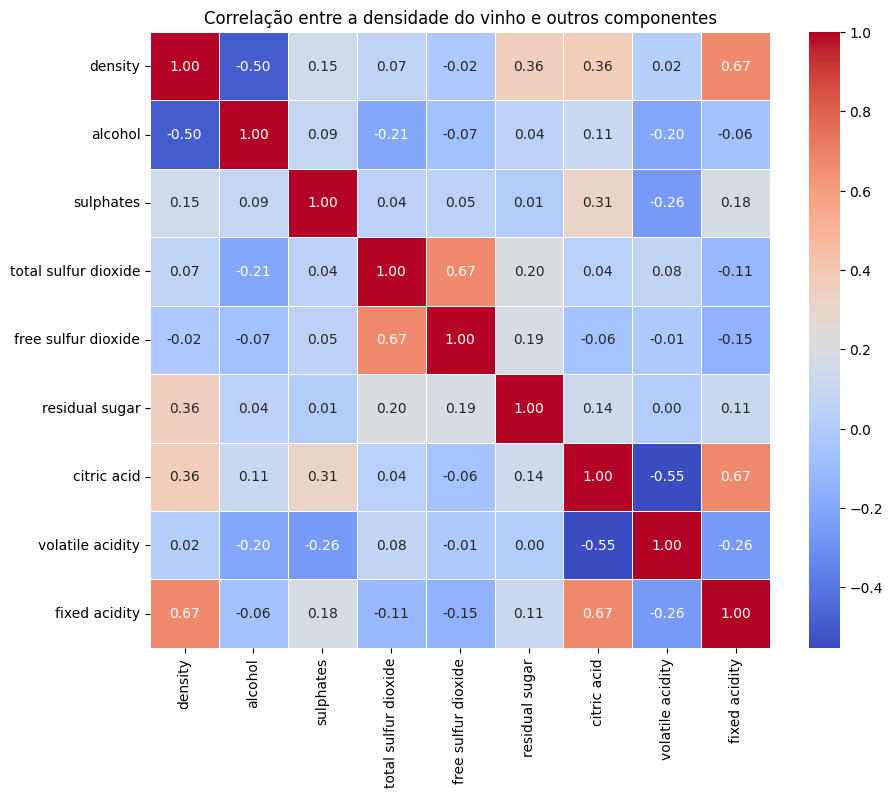

In [ ]:
cols = ['density', 'alcohol', 'sulphates','total sulfur dioxide', 'free sulfur dioxide', 'residual sugar', 'citric acid', 'volatile acidity', 'fixed acidity'] #colunas específicas para criar o heatmeap
plot_data = df[cols]

corr = plot_data.corr()
# calcula a correlação entre as colunas selecionadas

plt.figure(figsize=(10, 8))
# criando a imagem do heatmeap e definindo seu tamanho

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
# corr = matriz de correlação entre as variáveis; cmap define as cores; fmt = quantidade de decimais; linewidths = tamanho do espaçamento das linhas

plt.title('Correlação entre a densidade do vinho e outros componentes')
plt.show()

Resposta 3: Podemos concluir que há fatores que alteram a densidade do vinho positivamente (açucar residual e ácido cítrico) e negativamente (álcool)



#Pergunta 4: Qual é o impacto dos fatores de acidez (acidez fixa, acidez volátil, ácido cítrico) com a qualidade do vinho?

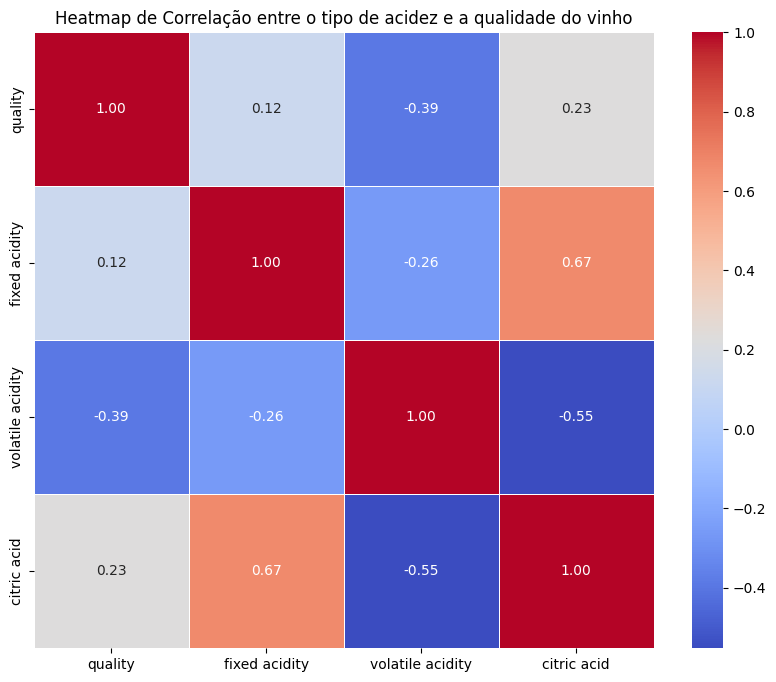

In [ ]:

cols = ['quality','fixed acidity','volatile acidity', 'citric acid'] #colunas específicas para criar o heatmeap
plot_data = df[cols]

corr = plot_data.corr()
# calcula a correlação entre as colunas selecionadas

plt.figure(figsize=(10, 8))
# criando a imagem do heatmeap e definindo seu tamanho

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
# corr = matriz de correlação entre as variáveis; cmap define as cores; fmt = quantidade de decimais; linewidths = tamanho do espaçamento das linhas

plt.title('Heatmap de Correlação entre o tipo de acidez e a qualidade do vinho')
plt.show()

Resposta 4: Podemos concluir que o ácido fixo é o único que apresenta uma correlação positiva com a qualidade (no valor de 0.67), indicando que os vinhos com grandes quantidade desse ácido apresenta também uma qualidade maior.

Isto porque o ácido fixo é responsável por equilibrar o calor e a suvavidade do álcool e dos açucares, tornando o vinho mais agradável ao paladar, além de ter origem das próprias uvas.





